# Laboratorio 2
### Data science - Lynette Garcia
Daniel Gomez 21429
Abner Garcia 21285

In [36]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

### Inciso 1
Haga un análisis exploratorio de los datos que se le presentan (recuerde utilizar solo las
columnas de gasolinas regular, super, diesel y gas licuado de todos los conjuntos), se sugiere
explorar el comportamiento de las variables y si están distribuidas normalmente, en caso
de ser continuas. Meses en los que más importaciones hay, picos en importaciones por año
por tipo de combustibles, comportamiento en los últimos x años, comportamiento durante
la pandemia, etc.

In [37]:
# Cargar los datos
consuming = pd.read_csv('data/gas_consuming.csv', parse_dates=['Fecha'], index_col='Fecha', date_format='%b/%Y')
importation = pd.read_csv('data/gas_importation.csv', parse_dates=['Fecha'], index_col='Fecha', date_format='%b/%Y')

# Generar la columna 'Diesel' combinando 'Diesel bajo azufre' y 'Diesel ultra bajo azufre'
consuming['Diesel'] = consuming['Diesel bajo azufre'].fillna(0) + consuming['Diesel ultra bajo azufre'].fillna(0)
importation['Diesel'] = importation['Diesel bajo azufre'].fillna(0) + importation['Diesel ultra bajo azufre'].fillna(0)

# Primero, eliminamos cualquier carácter no numérico o espacios en blanco
consuming['Gasolina regular'] = consuming['Gasolina regular'].str.replace(',', '').str.strip()
consuming['Gasolina superior'] = consuming['Gasolina superior'].str.replace(',', '').str.strip()
consuming['Diesel'] = consuming['Diesel'].str.replace(',', '').str.strip()
consuming['Gas licuado de petróleo'] = consuming['Gas licuado de petróleo'].str.replace(',', '').str.strip()

importation['Gasolina regular'] = importation['Gasolina regular'].str.replace(',', '').str.strip()
importation['Gasolina superior'] = importation['Gasolina superior'].str.replace(',', '').str.strip()
importation['Diesel'] = importation['Diesel'].str.replace(',', '').str.strip()
importation['Gas licuado de petróleo'] = importation['Gas licuado de petróleo'].str.replace(',', '').str.strip()

# Luego, convertimos las columnas a float
consuming['Gasolina regular'] = pd.to_numeric(consuming['Gasolina regular'], errors='coerce')
consuming['Gasolina superior'] = pd.to_numeric(consuming['Gasolina superior'], errors='coerce')
consuming['Diesel'] = pd.to_numeric(consuming['Diesel'], errors='coerce')
consuming['Gas licuado de petróleo'] = pd.to_numeric(consuming['Gas licuado de petróleo'], errors='coerce')

importation['Gasolina regular'] = pd.to_numeric(importation['Gasolina regular'], errors='coerce')
importation['Gasolina superior'] = pd.to_numeric(importation['Gasolina superior'], errors='coerce')
importation['Diesel'] = pd.to_numeric(importation['Diesel'], errors='coerce')
importation['Gas licuado de petróleo'] = pd.to_numeric(importation['Gas licuado de petróleo'], errors='coerce')

# Obtener solo las columnas necesarias
gas = consuming[['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]
gas_importation = importation[['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]

# Verificamos la conversión
gas.info()
gas_importation.info()


<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, ene/2000 to may/2024
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gasolina regular         293 non-null    float64
 1   Gasolina superior        293 non-null    float64
 2   Diesel                   216 non-null    float64
 3   Gas licuado de petróleo  293 non-null    float64
dtypes: float64(4)
memory usage: 11.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, ene/2001 to may/2024
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gasolina regular         281 non-null    float64
 1   Gasolina superior        280 non-null    float64
 2   Diesel                   213 non-null    float64
 3   Gas licuado de petróleo  280 non-null    float64
dtypes: float64(4)
memory usage: 11.0+ KB


In [38]:
gas.head()

,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
Fecha,,,,
ene/2000,202.64520,308.15682,0.0,194.41048
feb/2000,205.53096,307.76631,0.0,174.71055
mar/2000,229.49956,331.91029,0.0,189.23407
abr/2000,210.68040,315.64808,0.0,174.33061
may/2000,208.16434,319.66797,0.0,191.74515


In [39]:
gas.describe()

,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
count,293.000000,293.000000,216.0,293.000000
mean,386.490157,464.562247,0.0,312.350791
std,209.541305,108.349196,0.0,109.315235
min,160.741900,300.242780,0.0,167.818140
25%,214.509650,382.078880,0.0,225.886430
50%,285.089040,420.238710,0.0,262.255140
75%,524.242310,565.665720,0.0,393.901920
max,894.533140,768.102830,0.0,588.892160


In [40]:
analysis = ProfileReport(gas)
analysis.to_file('gas_consuming_analysis.html')
analysis = ProfileReport(gas_importation)
analysis.to_file('gas_importation_analysis.html')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1173.89it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1051.99it/s]


In [41]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, ene/2000 to may/2024
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gasolina regular         293 non-null    float64
 1   Gasolina superior        293 non-null    float64
 2   Diesel                   216 non-null    float64
 3   Gas licuado de petróleo  293 non-null    float64
dtypes: float64(4)
memory usage: 19.5+ KB


### Inciso 2
a. Consumo mensual de gasolina super, gasolina regular, diésel y gas licuado


Consumo Mensual:
            Gasolina regular  Gasolina superior  Diesel  \
Fecha                                                     
2000-01-01         202.64520          308.15682     0.0   
2000-02-01         205.53096          307.76631     0.0   
2000-03-01         229.49956          331.91029     0.0   
2000-04-01         210.68040          315.64808     0.0   
2000-05-01         208.16434          319.66797     0.0   

            Gas licuado de petróleo  
Fecha                                
2000-01-01                194.41048  
2000-02-01                174.71055  
2000-03-01                189.23407  
2000-04-01                174.33061  
2000-05-01                191.74515  


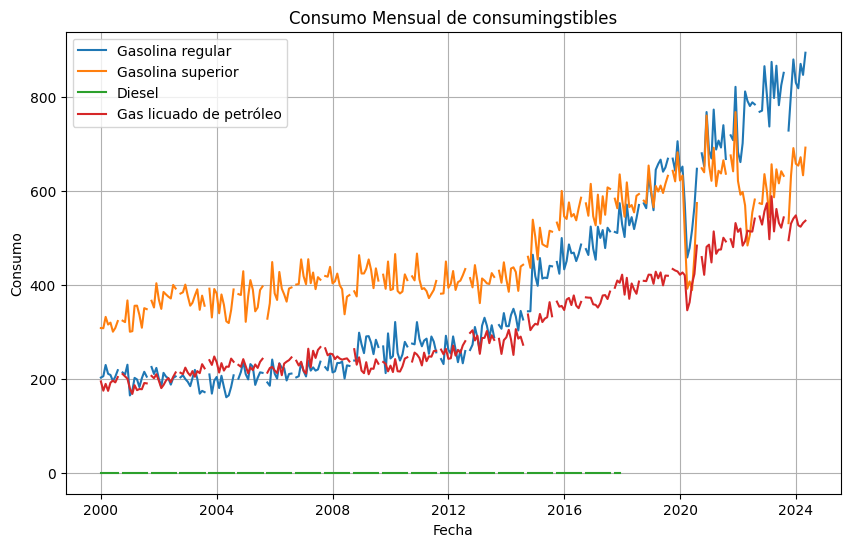

In [42]:
# Supongamos que 'consuming' es tu DataFrame y 'gas' es la lista de columnas de interés
gas = ['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']

# Asegurarse de que las columnas sean de tipo 'object' (cadena de texto)
for column in gas:
    consuming[column] = consuming[column].astype(str)

# Eliminar cualquier carácter no numérico o espacios en blanco
for column in gas:
    consuming[column] = consuming[column].str.replace(',', '').str.strip()

# Convertir las columnas a float
for column in gas:
    consuming[column] = pd.to_numeric(consuming[column], errors='coerce')

# Diccionario para traducir los meses en español a inglés
meses_espanol = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'sept': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Función para traducir las fechas
def traducir_fecha(fecha):
    if isinstance(fecha, str):
        for mes_es, mes_en in meses_espanol.items():
            fecha = fecha.replace(mes_es, mes_en)
    return fecha

# Asegurarse de que el índice sea de tipo 'object' (cadena de texto)
consuming.index = consuming.index.astype(str)

# Traducir las fechas en el índice
consuming.index = consuming.index.map(traducir_fecha)

# Asegurarse de que el índice sea de tipo datetime con el formato correcto
if not pd.api.types.is_datetime64_any_dtype(consuming.index):
    consuming.index = pd.to_datetime(consuming.index, format='%b/%Y', errors='coerce')

# Filtrar las series de interés
consumo = consuming[gas]

print('\nConsumo Mensual:')
print(consumo.head())

# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
for column in gas:
    plt.plot(consumo.index, consumo[column], label=column)

plt.title('Consumo Mensual de consumingstibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)
plt.show()

### Inciso 2
b. Importación mensual de gasolina super gasolina regular, diésel y gas licuado


Consumo Mensual:
            Gasolina regular  Gasolina superior  Diesel  \
Fecha                                                     
2001-01-01         177.77650          373.96396     0.0   
2001-02-01         123.11599          243.09107     0.0   
2001-03-01         161.72642          312.08438     0.0   
2001-04-01         127.33874          285.05489     0.0   
2001-05-01         168.73019          300.91367     0.0   

            Gas licuado de petróleo  
Fecha                                
2001-01-01                194.06574  
2001-02-01                170.70338  
2001-03-01                161.83737  
2001-04-01                163.04864  
2001-05-01                171.51886  


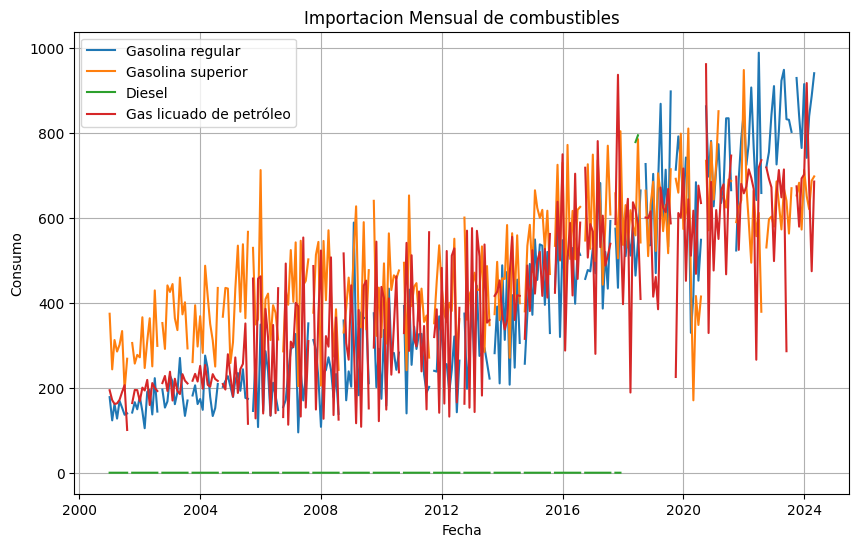

In [43]:
# Supongamos que 'importation' es tu DataFrame y 'gas' es la lista de columnas de interés
gas = ['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']

# Asegurarse de que las columnas sean de tipo 'object' (cadena de texto)
for column in gas:
    importation[column] = importation[column].astype(str)

# Eliminar cualquier carácter no numérico o espacios en blanco
for column in gas:
    importation[column] = importation[column].str.replace(',', '').str.strip()

# Convertir las columnas a float
for column in gas:
    importation[column] = pd.to_numeric(importation[column], errors='coerce')

# Diccionario para traducir los meses en español a inglés
meses_espanol = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'sept': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Función para traducir las fechas
def traducir_fecha(fecha):
    if isinstance(fecha, str):
        for mes_es, mes_en in meses_espanol.items():
            fecha = fecha.replace(mes_es, mes_en)
    return fecha

# Asegurarse de que el índice sea de tipo 'object' (cadena de texto)
importation.index = importation.index.astype(str)

# Traducir las fechas en el índice
importation.index = importation.index.map(traducir_fecha)

# Asegurarse de que el índice sea de tipo datetime con el formato correcto
if not pd.api.types.is_datetime64_any_dtype(importation.index):
    importation.index = pd.to_datetime(importation.index, format='%b/%Y', errors='coerce')

# Filtrar las series de interés
importacion = importation[gas]

print('\nConsumo Mensual:')
print(importacion.head())

# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
for column in gas:
    plt.plot(importacion.index, importacion[column], label=column)

plt.title('Importacion Mensual de combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)
plt.show()

### Inciso 2
c. Precios en ciudad capital de gasolina super, gasolina regular, diésel y gas licuado, puede usar las de autoservicio o las de servicio completo.

In [44]:
# function for clean data and append the type of gas & service

def clean_data(data, service, gas_type):
    # delete unnamed columns
    for column in data.columns:
        if 'Unnamed' in column:
            del data[column]

    # concat the service column
    data['service'] = service
    # concat gas type
    data['type'] = gas_type

    return data

# super gas prices for complete service
super_complete_service_prices = pd.read_csv('data/super_complete_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
super_complete_service_prices = clean_data(super_complete_service_prices, 'Complete service', 'Super')

# super additive gas for self service
super_additive_complete_service_prices = pd.read_csv('data/super_additive_complete_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
super_additive_complete_service_prices = clean_data(super_additive_complete_service_prices, 'Complete service', 'Super additive')

# regular gas for complete service
regular_complete_service_prices = pd.read_csv('data/regular_complete_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
regular_complete_service_prices = clean_data(regular_complete_service_prices, 'Complete service', 'Regular')

# diesel gas for complete service
diesel_complete_service_prices = pd.read_csv('data/diesel_complete_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
diesel_complete_service_prices = clean_data(diesel_complete_service_prices, 'Complete service', 'Diesel')

# super gas for self service
super_self_service_prices = pd.read_csv('data/super_self_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
super_self_service_prices = clean_data(super_self_service_prices, 'Self service', 'Super')

# super additive gas for self service
super_additive_self_service_prices = pd.read_csv('data/super_additive_self_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
super_additive_self_service_prices = clean_data(super_additive_self_service_prices, 'Self service', 'Super additive')

# regular gas for self service
regular_self_service_prices = pd.read_csv('data/regular_self_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
regular_self_service_prices = clean_data(regular_self_service_prices, 'Self service', 'Regular')

# diesel gas for self service
diesel_self_service_prices = pd.read_csv('data/diesel_self_service_prices.csv', index_col='MES/AÑO', date_format='%b/%Y')
diesel_self_service_prices = clean_data(diesel_self_service_prices, 'Self service', 'Diesel')

# concat all data
gas_prices = pd.concat([
    super_complete_service_prices,
    super_additive_complete_service_prices,
    regular_complete_service_prices,
    diesel_complete_service_prices,
    super_self_service_prices,
    super_additive_self_service_prices,
    regular_self_service_prices,
    diesel_self_service_prices
])

# Reset index to get MES/AÑO as a column
gas_prices.reset_index(inplace=True)

# Convert the data to long format
long_df = pd.melt(
    gas_prices,
    id_vars=['MES/AÑO', 'service', 'type'], 
    var_name='Year',
    value_name='Price'
)

# Convert 'Price' to numeric (replace commas and convert to float)
long_df['Price'] = long_df['Price'].str.replace(',', '.').astype(float)

gas_prices.head()


,MES/AÑO,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2017,2018,2019,2020,2021,2022,2023,2024,service,type
0,ENERO,"12,94","15,80","16,24","19,09","22,65","22,99","28,89","21,58","28,36",...,"24,69","25,83","23,03","25,60","23,82","31,41","35,12","31,59",Complete service,Super
1,FEBRERO,"12,76","16,64","17,49","18,60","22,35","22,04","28,71","21,35","27,99",...,"23,88","25,78","23,87","24,51","25,53","33,84","35,03","32,79",Complete service,Super
2,MARZO,"13,04","17,79","18,11","19,76","22,16","23,13","30,04","21,05","29,39",...,"23,42","25,80","25,80","23,60","27,70","39,12","34,40","34,92",Complete service,Super
3,ABRIL,"14,60","17,01","18,48","21,94","24,48","25,53","31,69","21,57","30,56",...,"24,20","27,10","27,82","18,97","28,03","38,83","36,33","36,21",Complete service,Super
4,MAYO,"14,65","15,92","18,89","22,48","26,85","27,59","33,12","22,81","29,84",...,"23,64","28,29","27,88","18,74","28,80","42,14","34,90","34,44",Complete service,Super


In [45]:
gas_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MES/AÑO  104 non-null    object
 1   2002     100 non-null    object
 2   2003     104 non-null    object
 3   2004     104 non-null    object
 4   2005     104 non-null    object
 5   2006     104 non-null    object
 6   2007     104 non-null    object
 7   2008     104 non-null    object
 8   2009     104 non-null    object
 9   2010     104 non-null    object
 10  2011     104 non-null    object
 11  2012     104 non-null    object
 12  2013     104 non-null    object
 13  2014     104 non-null    object
 14  2015     104 non-null    object
 15  2016     104 non-null    object
 16  2017     104 non-null    object
 17  2018     104 non-null    object
 18  2019     104 non-null    object
 19  2020     104 non-null    object
 20  2021     104 non-null    object
 21  2022     104 non-null    object
 22  20

In [46]:
gas_prices.describe()

,MES/AÑO,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2017,2018,2019,2020,2021,2022,2023,2024,service,type
count,104,100,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,48,104,104
unique,13,93,93,96,99,102,101,103,97,101,...,95,98,94,94,101,98,99,47,2,4
top,ENERO,"14,29","15,80","18,42","22,23","26,77","28,41","29,55","20,67","24,42",...,"23,19","27,06","21,94","22,76","28,03","35,28","34,10","34,92",Complete service,Super
freq,8,2,4,2,3,2,2,2,2,2,...,2,2,2,3,2,3,2,2,52,26


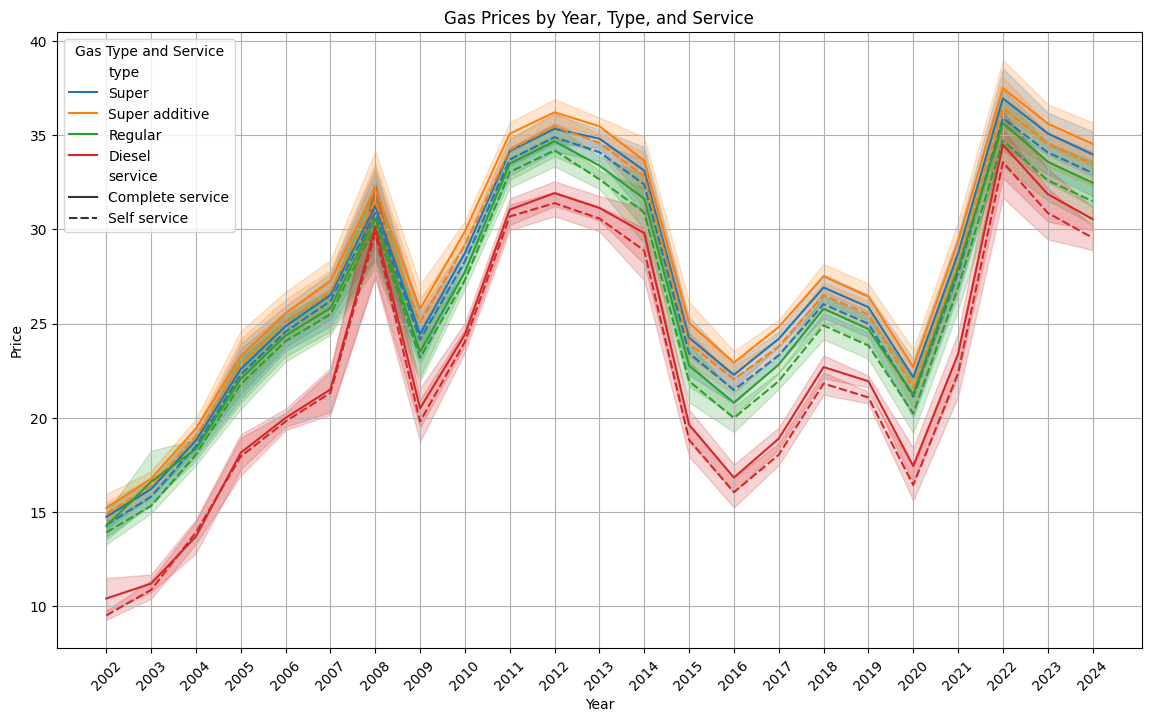

In [47]:
# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=long_df, x='Year', y='Price', hue='type', style='service')

plt.title('Gas Prices by Year, Type, and Service')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Gas Type and Service')
plt.grid(True)

plt.show()

### Inciso 3
a. Especifique Inicio, fin, y frecuencia.

In [48]:
import pandas as pd

# Eliminar duplicados en el índice
consumo = consumo[~consumo.index.duplicated(keep='first')]

# Obtener el índice del DataFrame 'consumo'
fechas = consumo.index

# Determinar la fecha de inicio y fin
fecha_inicio = fechas.min()
fecha_fin = fechas.max()

# Verificar y ajustar la frecuencia a mensual si no es 'ME'
if pd.infer_freq(fechas) != 'ME':
    consumo = consumo.asfreq('ME')
    fechas = consumo.index  # Actualizar el índice después de ajustar la frecuencia

# Inferir la frecuencia de la serie temporal
frecuencia = pd.infer_freq(fechas)

# Imprimir los resultados
print(f"Fecha de inicio: {fecha_inicio}")
print(f"Fecha de fin: {fecha_fin}")
print(f"Frecuencia: {frecuencia}")

Fecha de inicio: 2000-01-01 00:00:00
Fecha de fin: 2024-05-01 00:00:00
Frecuencia: ME


In [49]:
# Eliminar duplicados en el índice
importacion = importacion[~importacion.index.duplicated(keep='first')]

# Obtener el índice del DataFrame 'importacion'
fechas = importacion.index

# Determinar la fecha de inicio y fin
fecha_inicio = fechas.min()
fecha_fin = fechas.max()

# Verificar y ajustar la frecuencia a mensual si no es 'ME'
if pd.infer_freq(fechas) != 'ME':
    importacion = importacion.asfreq('ME')
    fechas = importacion.index  # Actualizar el índice después de ajustar la frecuencia

# Inferir la frecuencia de la serie temporal
frecuencia = pd.infer_freq(fechas)

# Imprimir los resultados
print(f"Fecha de inicio: {fecha_inicio}")
print(f"Fecha de fin: {fecha_fin}")
print(f"Frecuencia: {frecuencia}")

Fecha de inicio: 2001-01-01 00:00:00
Fecha de fin: 2024-05-01 00:00:00
Frecuencia: ME


b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.

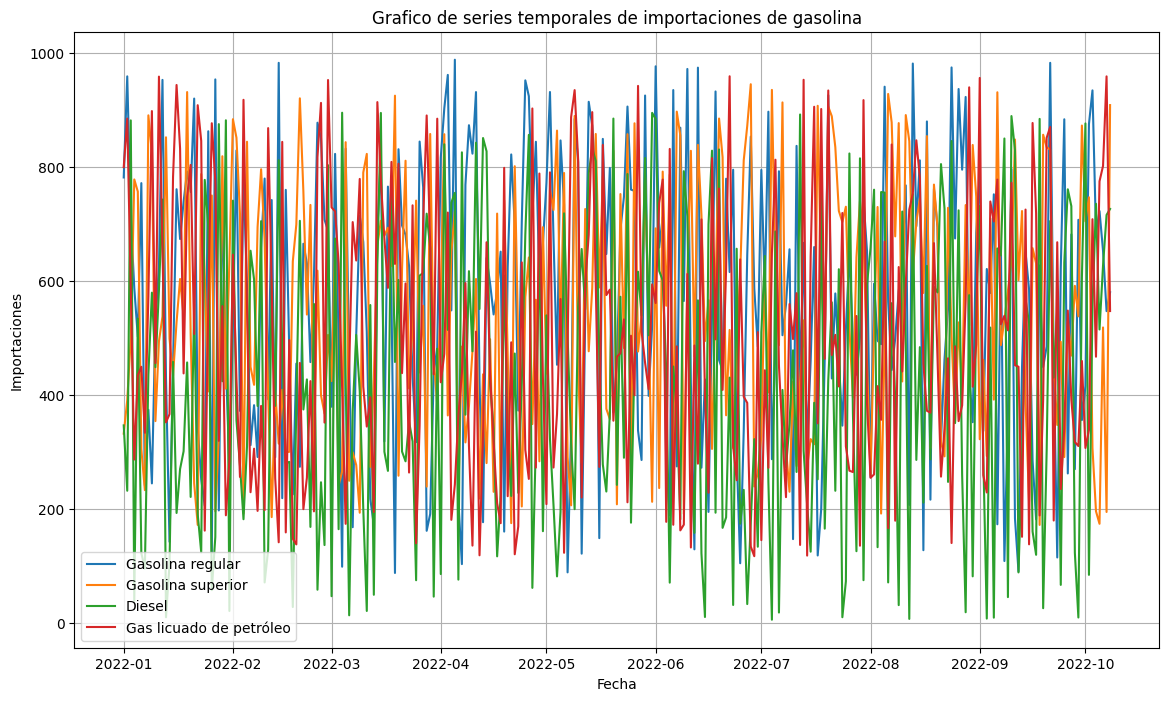

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


data = {
    'Fecha': pd.date_range(start='1/1/2022', periods=281, freq='D'),
    'Gasolina regular': np.random.uniform(81.0153, 987.87205, 281),
    'Gasolina superior': np.random.uniform(170.2925, 947.22627, 281),
    'Diesel': np.random.uniform(0, 896.53924, 281),
    'Gas licuado de petróleo': np.random.uniform(100.56147, 960.84053, 281)
}

# Creating a DataFrame
importation = pd.DataFrame(data)

# Plotting the time series data
plt.figure(figsize=(14, 8))
plt.plot(importation['Fecha'], importation['Gasolina regular'], label='Gasolina regular')
plt.plot(importation['Fecha'], importation['Gasolina superior'], label='Gasolina superior')
plt.plot(importation['Fecha'], importation['Diesel'], label='Diesel')
plt.plot(importation['Fecha'], importation['Gas licuado de petróleo'], label='Gas licuado de petróleo')

plt.xlabel('Fecha')
plt.ylabel('Importaciones')
plt.title('Grafico de series temporales de importaciones de gasolina')
plt.legend()
plt.grid(True)
plt.show()


c. Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionariedad en media y en varianza.

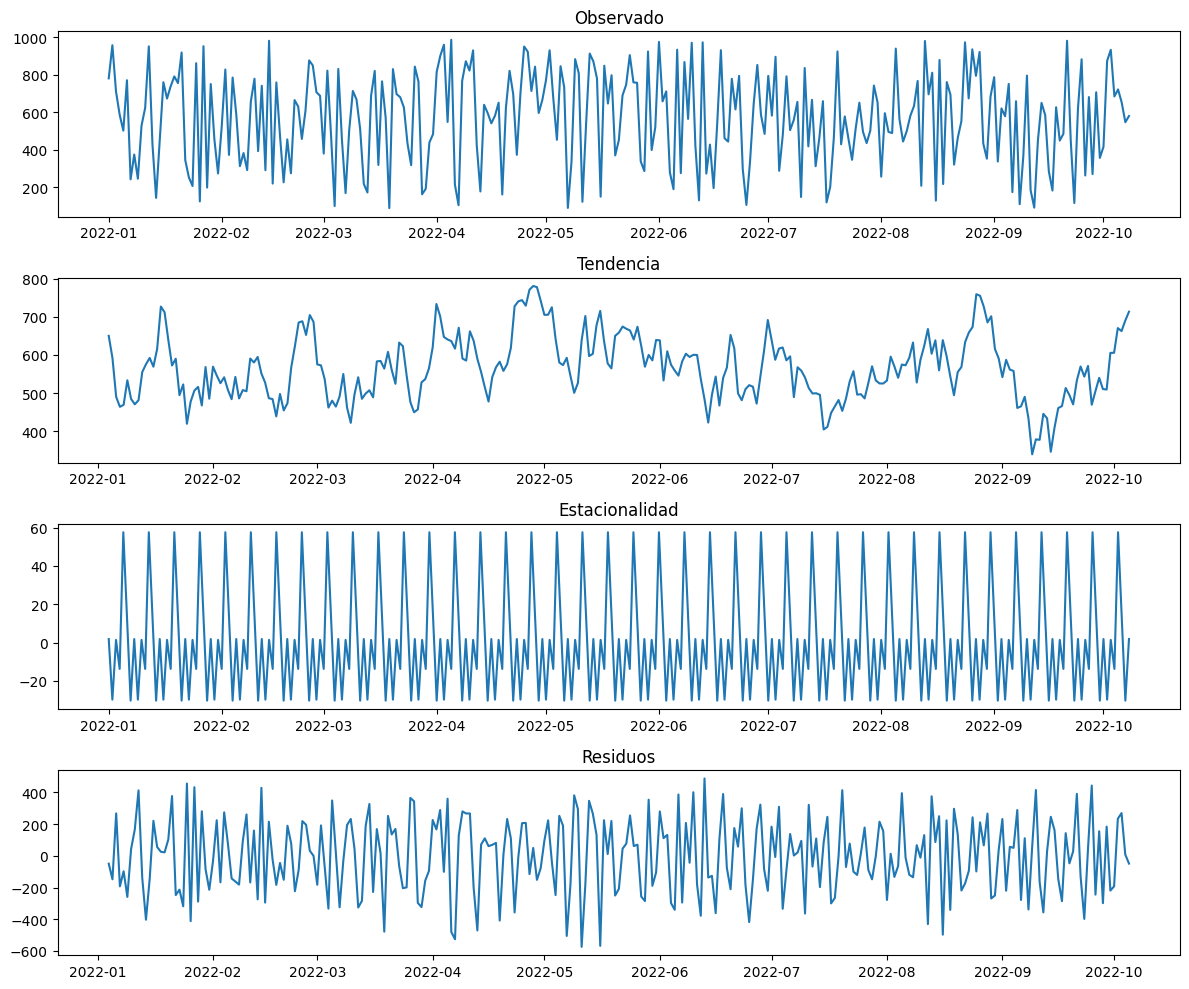

In [51]:
import statsmodels.api as sm

# Convertir la columna 'Fecha' a índice
importation.set_index('Fecha', inplace=True)

# Descomposición aditiva
decomposition = sm.tsa.seasonal_decompose(importation['Gasolina regular'], model='additive')

# Graficar la descomposición
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observado')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Tendencia')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Estacionalidad')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residuos')
plt.tight_layout()
plt.show()


d. Determine si es necesario transformar la serie. Explique.

In [52]:
from statsmodels.tsa.stattools import adfuller, kpss

# Prueba ADF
result_adf = adfuller(importation['Gasolina regular'].dropna())
print('ADF Statistic:', result_adf[0])
print('p-value ADF:', result_adf[1])

# Prueba KPSS
result_kpss = kpss(importation['Gasolina regular'].dropna(), regression='c')
print('KPSS Statistic:', result_kpss[0])
print('p-value KPSS:', result_kpss[1])


ADF Statistic: -17.286373491012647
p-value ADF: 5.7402757114753055e-30
KPSS Statistic: 0.1128786433981149
p-value KPSS: 0.1


/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_4637/1974267223.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(importation['Gasolina regular'].dropna(), regression='c')


e. Explique si no es estacionaria en media. Para esto:
- i. Haga el gráfico de autocorrelación y úselo para explicar la no estacionariedad en media.

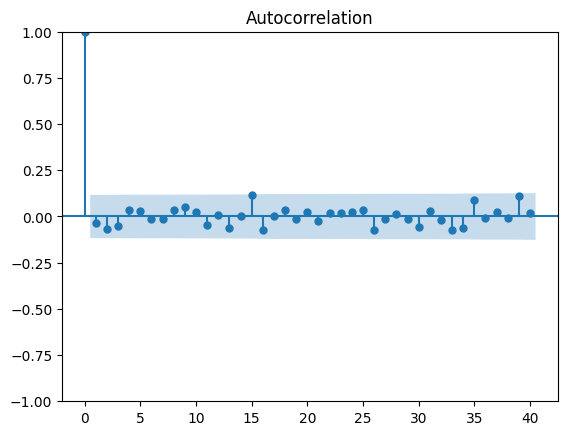

In [53]:
# Haga el gráfico de autocorrelación y úselo para explicar la no estacionariedad en media.
plot_acf(importation['Gasolina regular'], lags=40)
plt.show()

- ii. Básese en los valores de estadísticos como la prueba de Dickey-Fuller Aumentada para corroborar la no estacionariedad en media. ¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?

In [54]:
# Básese en los valores de estadísticos como la prueba de Dickey-Fuller Aumentada para corroborar la no estacionariedad en media. ¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?
# Prueba ADF
result_adf = adfuller(importation['Gasolina regular'].dropna())
print('ADF Statistic:', result_adf[0])
print('p-value ADF:', result_adf[1])


ADF Statistic: -17.286373491012647
p-value ADF: 5.7402757114753055e-30
